In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.ndimage import uniform_filter

# Gaussian

In [2]:
with open('/n/ramanathan_lab/aboesky/reward_contours/skinnycontours_100.pkl', 'rb') as f:
    contours = pickle.load(f)

In [3]:
contours[50].shape

(1000, 1000)

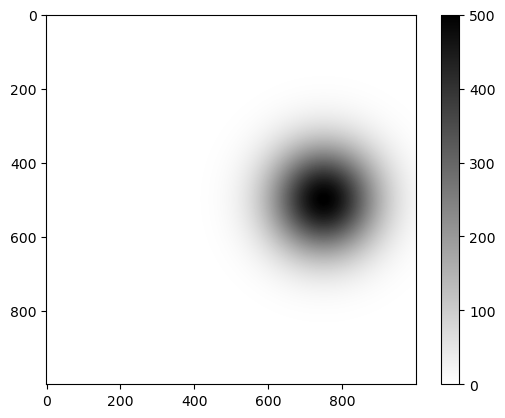

In [4]:
plt.imshow(contours[0], cmap='binary')
plt.colorbar()

In [6]:
agent_paths = []
for i in range(100):
    with open(f'/n/ramanathan_lab/aboesky/stationary_wrap_results/agent_{i}.pkl', 'rb') as f:
        agent_paths.append(pickle.load(f))

In [7]:
path_density = np.zeros((1000, 1000))
for path in agent_paths:
    path_density[path[:,0], path[:,1]] += 1

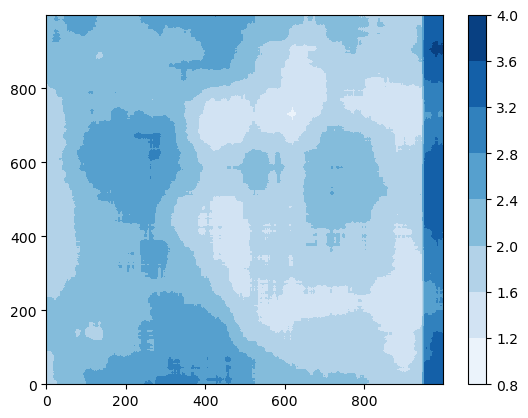

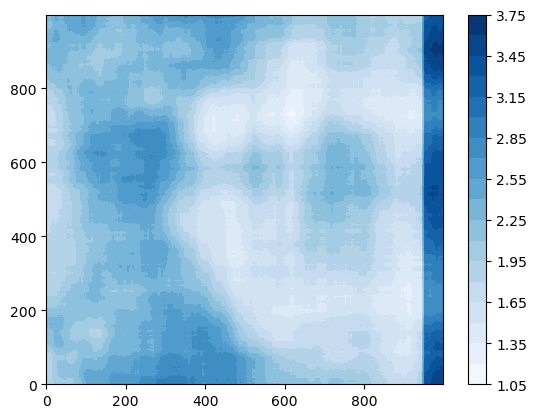

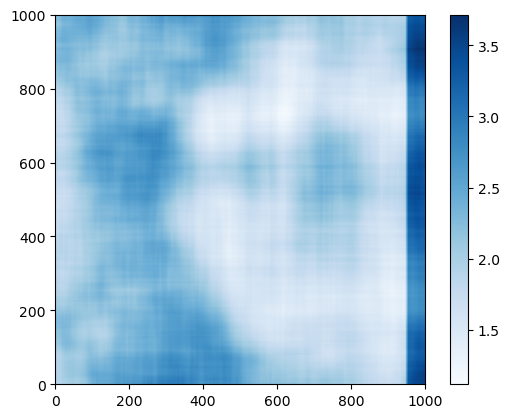

In [8]:
N = len(path[0])
path_filtered = uniform_filter(path_density, size=100)
plt.contourf(path_filtered, cmap='Blues')
plt.colorbar()
plt.savefig('/n/home04/aboesky/ramanthan/Predictive_Coding/plots/path_density_8.svg')
plt.show()
plt.contourf(path_filtered, cmap='Blues', levels=20)
plt.colorbar()
plt.savefig('/n/home04/aboesky/ramanthan/Predictive_Coding/plots/path_density_20.svg')
plt.show()
plt.imshow(np.flipud(path_filtered), extent=(0, 1000, 0, 1000), cmap='Blues')
plt.colorbar()
plt.savefig('/n/home04/aboesky/ramanthan/Predictive_Coding/plots/path_density.svg')
plt.show()

Try putting the peak in the middle

In [9]:
with open('/n/ramanathan_lab/aboesky/reward_contours/center_contour.pkl', 'rb') as f:
    contours = pickle.load(f)

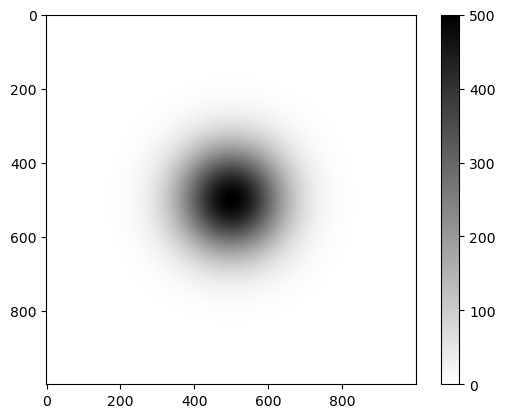

In [11]:
plt.imshow(contours[0], cmap='binary')
plt.colorbar()

In [13]:
agent_paths = []
for i in range(100):
    with open(f'/n/ramanathan_lab/aboesky/center_stationary_wrap_results/agent_{i}.pkl', 'rb') as f:
        agent_paths.append(pickle.load(f))

In [14]:
path_density = np.zeros((1000, 1000))
for path in agent_paths:
    path_density[path[:,0], path[:,1]] += 1

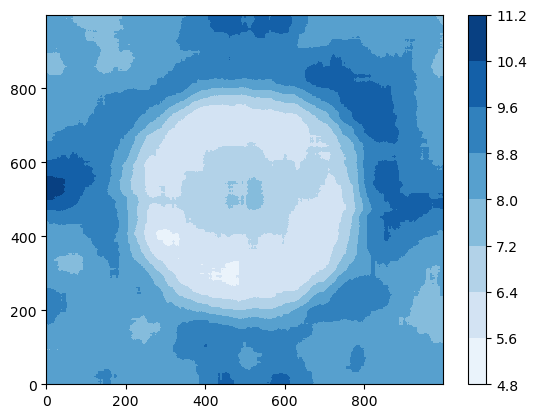

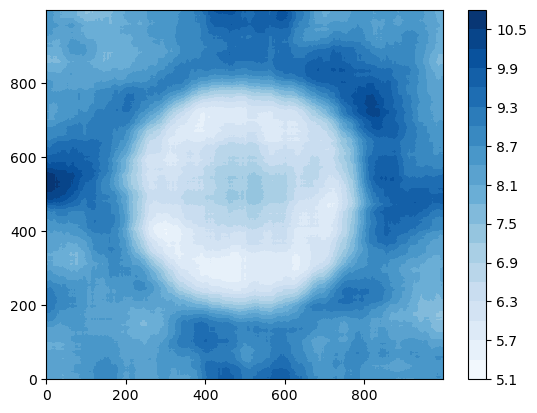

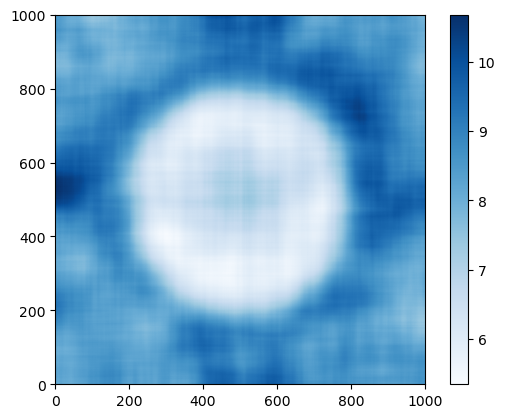

In [15]:
N = len(path[0])
path_filtered = uniform_filter(path_density, size=100)
plt.contourf(path_filtered, cmap='Blues')
plt.colorbar()
plt.savefig('/n/home04/aboesky/ramanthan/Predictive_Coding/plots/path_density_8.svg')
plt.show()
plt.contourf(path_filtered, cmap='Blues', levels=20)
plt.colorbar()
plt.savefig('/n/home04/aboesky/ramanthan/Predictive_Coding/plots/path_density_20.svg')
plt.show()
plt.imshow(np.flipud(path_filtered), extent=(0, 1000, 0, 1000), cmap='Blues')
plt.colorbar()
plt.savefig('/n/home04/aboesky/ramanthan/Predictive_Coding/plots/path_density.svg')
plt.show()

# Pyramid

In [4]:
agent_paths = []
for i in range(500):
    with open(f'/n/ramanathan_lab/aboesky/alternating_10000_pyramid_results/agent_{i}.pkl', 'rb') as f:
        agent_paths.append(pickle.load(f))

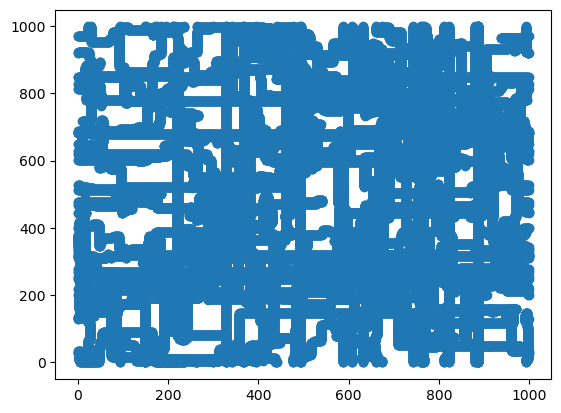

In [6]:
# One path
ind = 25
plt.scatter(agent_paths[ind][:, 1], agent_paths[ind][:, 0])

In [7]:
# Calculate path density
path_density = np.zeros((1000, 1000))
for path in agent_paths:
    path_density[path[:,0], path[:,1]] += 1

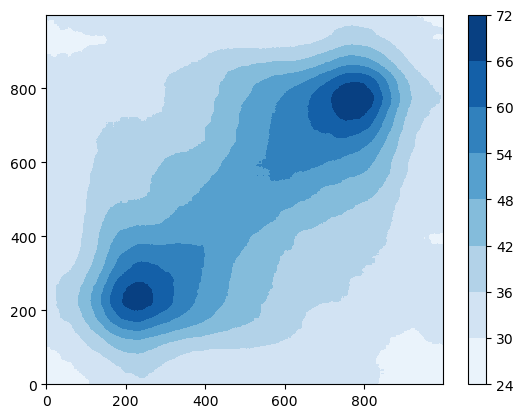

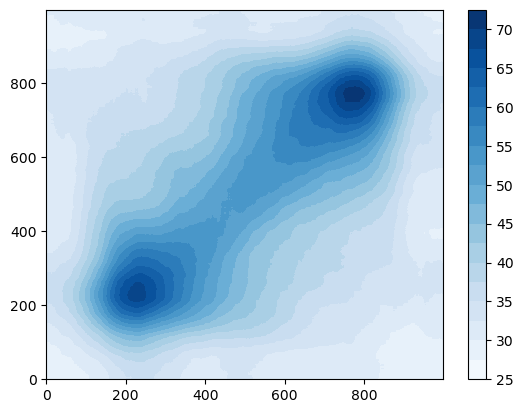

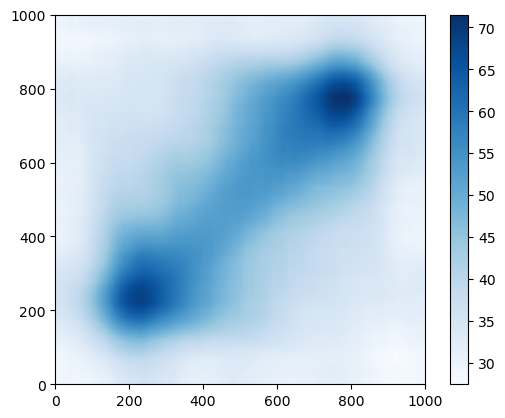

In [72]:
N = len(path[0])
path_filtered = uniform_filter(path_density, size=100)
plt.contourf(path_filtered, cmap='Blues')
plt.colorbar()
plt.savefig('/n/home04/aboesky/ramanthan/Predictive_Coding/plots/path_density_8.svg')
plt.show()
plt.contourf(path_filtered, cmap='Blues', levels=20)
plt.colorbar()
plt.savefig('/n/home04/aboesky/ramanthan/Predictive_Coding/plots/path_density_20.svg')
plt.show()
plt.imshow(np.flipud(path_filtered), extent=(0, 1000, 0, 1000), cmap='Blues')
plt.colorbar()
plt.savefig('/n/home04/aboesky/ramanthan/Predictive_Coding/plots/path_density.svg')
plt.show()

# Plot the contours

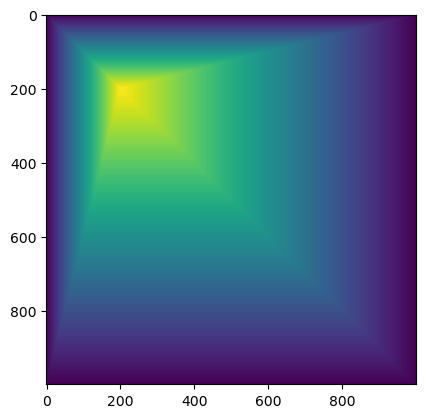

In [34]:
# Get countours
with open('/n/ramanathan_lab/aboesky/reward_contours/pyramids_100.pkl', 'rb') as f:
    contours = pickle.load(f)

plt.imshow(contours[0])

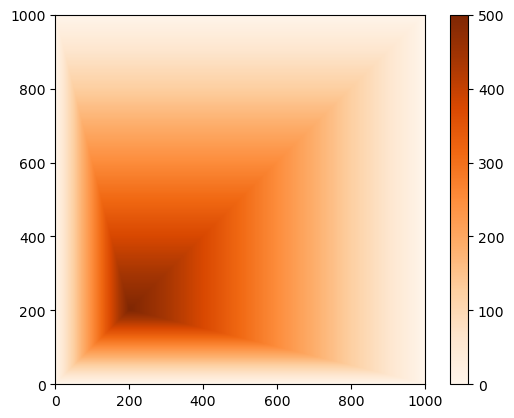

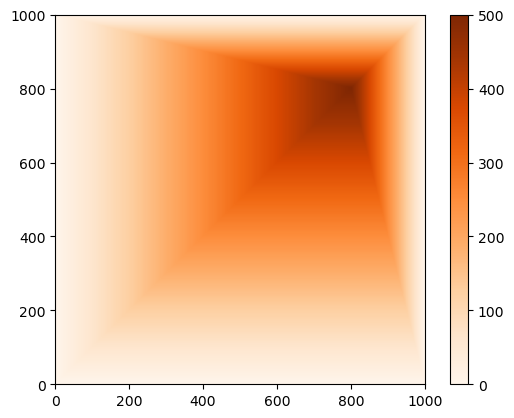

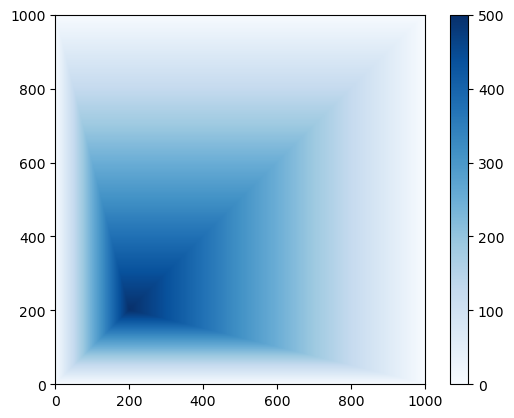

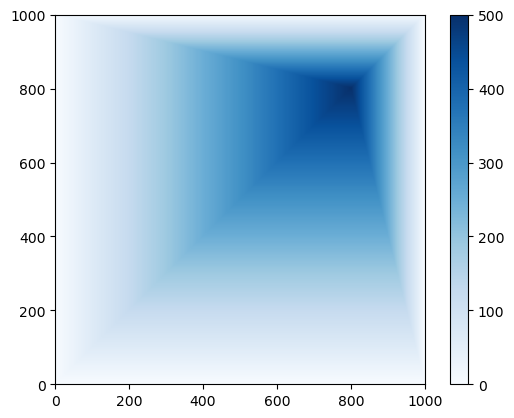

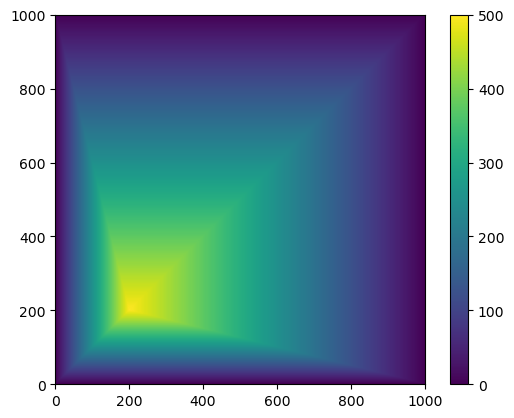

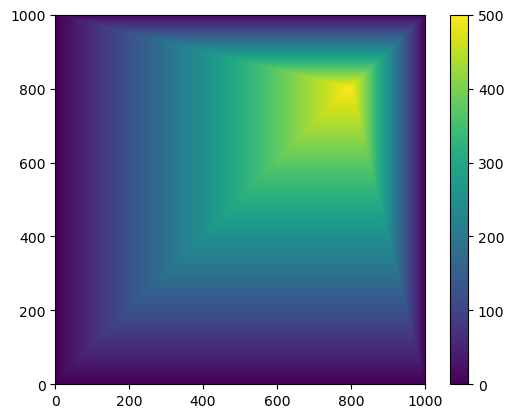

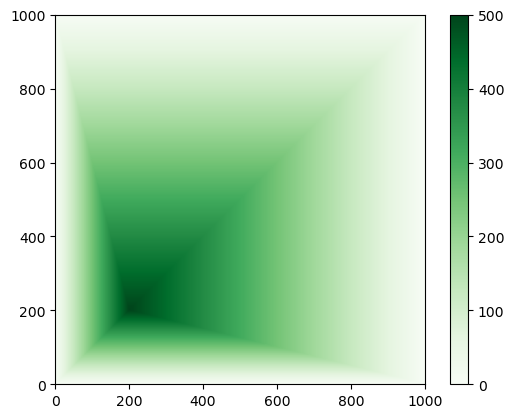

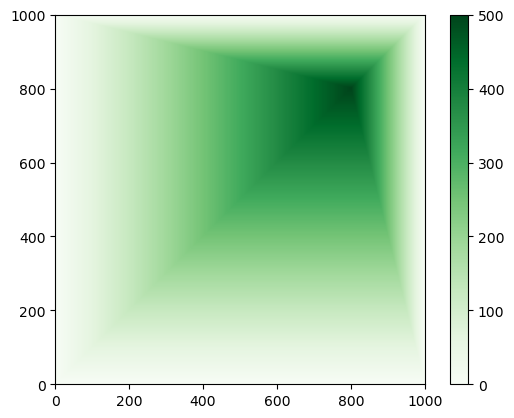

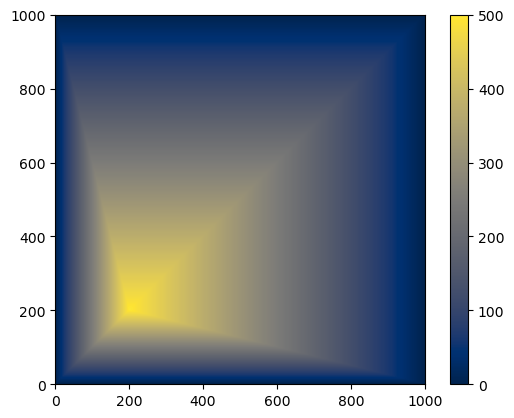

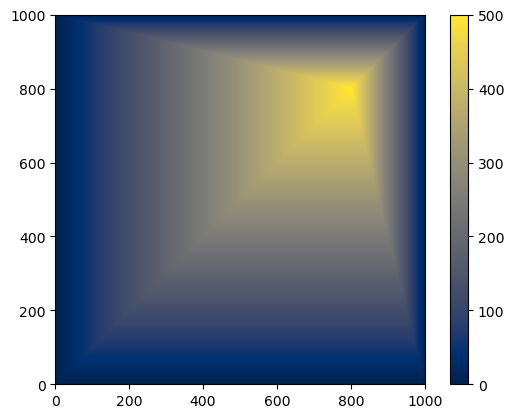

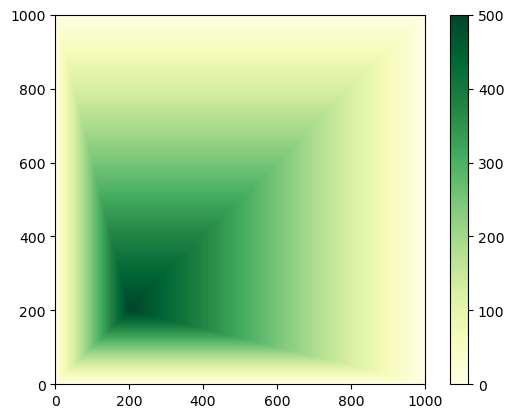

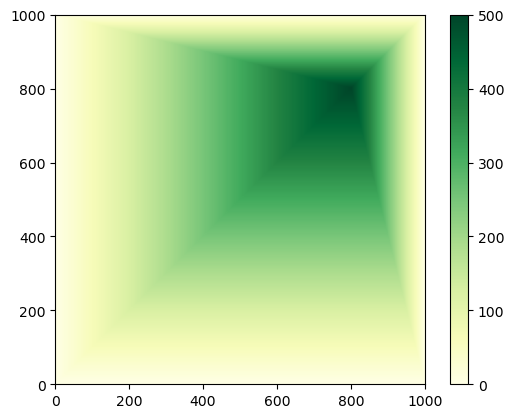

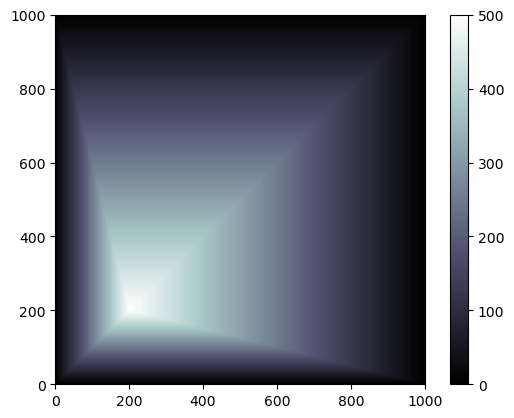

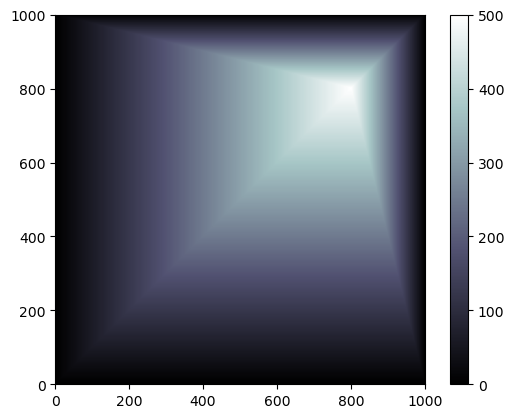

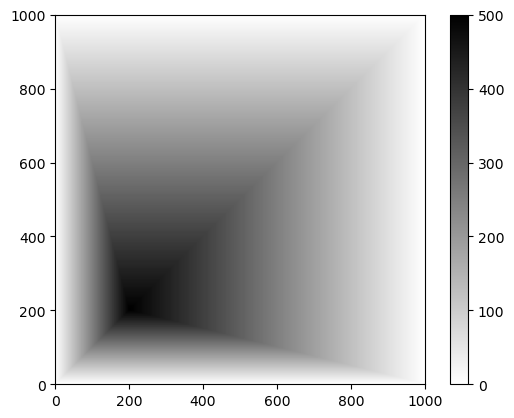

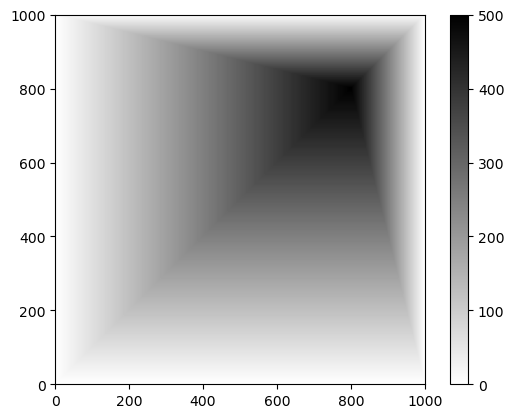

In [69]:
# Bunch of different colors
i=0
plt.imshow(np.flipud(contours[0]), cmap='Oranges', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[50]), cmap='Oranges', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[0]), cmap='Blues', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[50]), cmap='Blues', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[0]), extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[50]), extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[0]), cmap='Greens', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[50]), cmap='Greens', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[0]), cmap='cividis', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[50]), cmap='cividis', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[0]), cmap='YlGn', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[50]), cmap='YlGn', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[0]), cmap='bone', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[50]), cmap='bone', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[0]), cmap='binary', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()
plt.imshow(np.flipud(contours[50]), cmap='binary', extent=(0, 1000, 0, 1000))
plt.colorbar()
plt.savefig(f'/n/home04/aboesky/ramanthan/Predictive_Coding/plots/contour_{i}.svg')
i+=1
plt.show()

# Make the contours

In [15]:
def gaussian_2d(x, y, x0, y0, sigma_x, sigma_y) -> np.ndarray:
    """Function that makes a 2d gaussian and returns the rewardcontour as a 2d numpy  array"""
    return np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))

def create_pyramid_contour(x, y, peak_x, peak_y, max_h = 5):
    """Function that makes a 2d pyramid and returns the rewardcontour as a 2d numpy  array"""
    width = len(x)
    u = (1 / peak_y) * y
    l = (1 / peak_x) * x
    r = (1 / (peak_x - width)) * (x - width)
    d = (1 / (peak_y - width)) * (y - width)
    pyramid_height = np.minimum(np.minimum(np.minimum(d, r), u), l)

    return (pyramid_height / np.max(pyramid_height)) * max_h

In [52]:
# Define the grid dimensions
grid_size = 1000
x = np.linspace(0, 999, grid_size)
y = np.linspace(0, 999, grid_size)
x, y = np.meshgrid(x, y)

# Parametrize the circular motion of the gaussian peak
t_period = 1000                                       # period/number of timesteps of the rotaton
angle = np.linspace(0, 2*np.pi, num=t_period)           # angular location for each peak
r = 250                                                 # radius from the center of the grid to the peak
xs, ys = r*np.cos(angle) + 500, r*np.sin(angle) + 500   # get the xs and ys of the peak
sigma_x, sigma_y = 100, 100                             # standard deviations

# Create the contours and store them in a list
z = gaussian_2d(x, y, 500, 500, sigma_x, sigma_y)
z = (z * 500) / np.max(z)  # scale so that the peak is 500

In [7]:
with open('/n/ramanathan_lab/aboesky/reward_contours/center_contour.pkl', 'wb') as f:
    pickle.dump([z], f)

In [50]:
# Define the grid dimensions
grid_size = 1000
x = np.linspace(0, 999, grid_size)
y = np.linspace(0, 999, grid_size)
x, y = np.meshgrid(x, y)

# Parametrize the circular motion of the gaussian peak
t_period = 1000                                       # period/number of timesteps of the rotaton
angle = np.linspace(0, 2*np.pi, num=t_period)           # angular location for each peak
r = 250                                                 # radius from the center of the grid to the peak
xs, ys = r*np.cos(angle) + 500, r*np.sin(angle) + 500   # get the xs and ys of the peak

# Create the contours and store them in a list
z = create_pyramid_contour(x, y, 800, 500)
z = (z * 500) / np.max(z)  # scale so that the peak is 500

In [11]:
num_points_per_segment = 25

# Coordinates for the square path
points = [(200, 200), (800, 200), (800, 800), (200, 800), (200, 200)]  # Closing the loop

# Generate the x and y coordinates for the square path
x_coords, y_coords = [], []
for i in range(len(points) - 1):
    x_coords.extend(np.linspace(points[i][0], points[i+1][0], num_points_per_segment, endpoint=False))
    y_coords.extend(np.linspace(points[i][1], points[i+1][1], num_points_per_segment, endpoint=False))

# Convert to numpy arrays
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)

In [16]:
grids = []
grid_size = 1000
x = np.linspace(0, 999, grid_size)
y = np.linspace(0, 999, grid_size)
x, y = np.meshgrid(x, y)

for x_peak, y_peak in zip(x_coords, y_coords):
    z = create_pyramid_contour(x, y, x_peak, y_peak, max_h=500)
    grids.append(z)

# Make nice plot of the results with all the different parameterizations

In [8]:
results = []
out_dirs = ['alternating_10000_settle_1_OOL_pyramid_results', 'alternating_10000_settle_20_OOL_pyramid_results', 'alternating_10000_settle_1_pyramid_results', 'alternating_10000_settle_20_pyramid_results']

for _, dirname in enumerate(out_dirs):
    agent_paths = []
    for i in range(500):
        with open(f'/n/ramanathan_lab/aboesky/{dirname}/agent_{i}.pkl', 'rb') as f:
            agent_paths.append(pickle.load(f))
    path_density = np.zeros((1000, 1000))
    for path in agent_paths:
        path_density[path[:,0], path[:,1]] += 1
    results.append(np.copy(path_density))

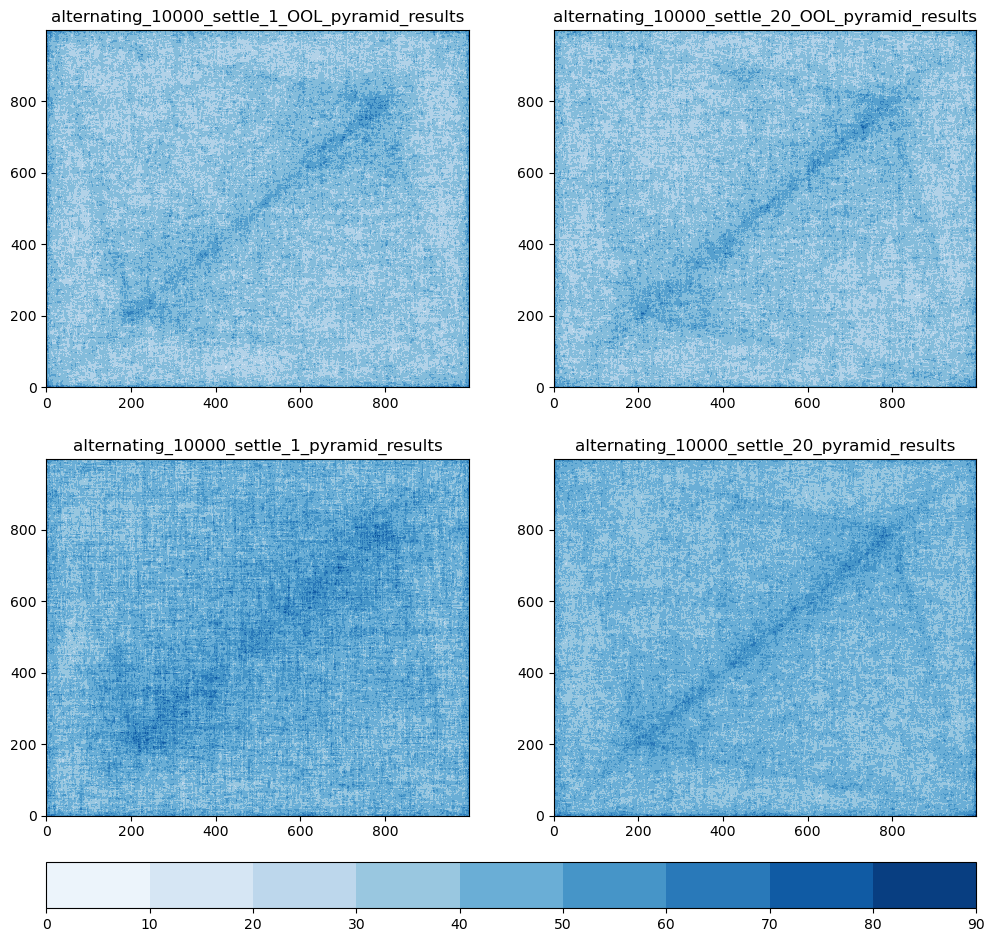

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, dir, res in zip(axes.flatten(), out_dirs, results):
    p1 = ax.contourf(res, cmap='Blues')
    ax.set_title(dir)
cbar = fig.colorbar(p1, ax=axes, orientation='horizontal', fraction=.1, pad=0.05)
plt.show()

In [10]:
agent_paths = []
for i in range(500):
    with open(f'/n/ramanathan_lab/aboesky/fixing/agent_{i}.pkl', 'rb') as f:
        agent_paths.append(pickle.load(f))
test = np.zeros((1000, 1000))
for path in agent_paths:
    test[path[:,0], path[:,1]] += 1

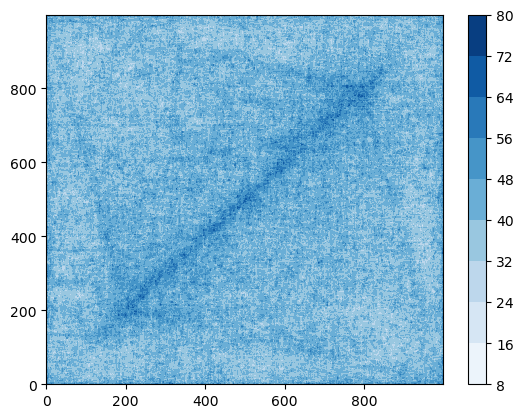

In [11]:
plt.contourf(test, cmap='Blues')
plt.colorbar()
plt.show()